In [1]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# 디렉토리 및 파일 이름에 맞추어 변경
# font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.
font_location = '../data04/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

# 기계의 고장 유무 판단

## 1. 데이터 전처리

In [3]:
machine = pd.read_csv("./기계마모.csv", encoding="utf-8")
machine

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
machine.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [6]:
machine.drop(['UDI', 'Product ID'], axis = 1, inplace=True)

In [7]:
machine

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
machine["Type"] = encoder.fit_transform(machine["Type"])
machine.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,No Failure
1,1,298.2,308.7,1408,46.3,3,0,No Failure
2,1,298.1,308.5,1498,49.4,5,0,No Failure
3,1,298.2,308.6,1433,39.5,7,0,No Failure
4,1,298.2,308.7,1408,40.0,9,0,No Failure


In [11]:
# O : Type H
# 1 : Type L
# 2 : Type M

## 2. EDA(시각화)

In [12]:
machine.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


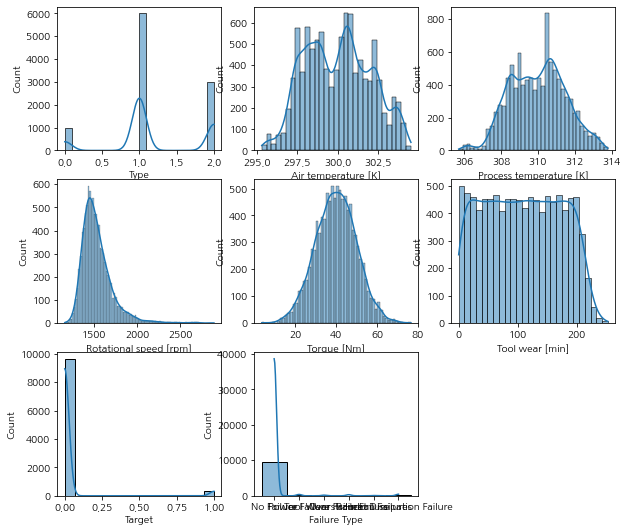

In [13]:
plt.figure(figsize=(10,9))
for i,col in enumerate(machine.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(machine[col],kde=True)

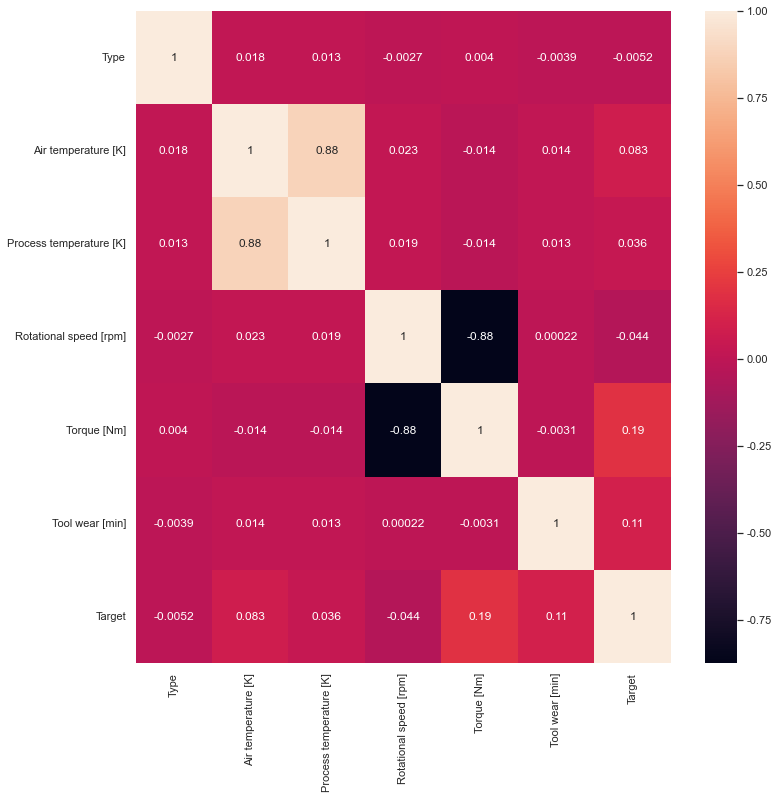

In [14]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1)
sns.heatmap(machine.corr(), annot = True, cbar = True)
plt.show()

In [15]:
corr_order=machine.corr().loc[:'Tool wear [min]','Target'].abs().sort_values(ascending=False)
corr_order

Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Rotational speed [rpm]     0.044188
Process temperature [K]    0.035946
Type                       0.005152
Name: Target, dtype: float64

In [16]:
# 상관관계 분석

# Target과의 상관도가 낮기 때문에 특정 feature가 Target에 영향을 미친다고 보기 어렵다.

## 3. 머신러닝

### 1) train data와 test data 분할

In [17]:
X_data = machine.loc[:,"Type":"Tool wear [min]"]
Y_data = machine.loc[:,"Target"]

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(
                            X_data,
                            Y_data,
                            test_size=0.2,
                            random_state=42
)

In [19]:
# train data, test data 확인
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(8000, 6) (8000,) (2000, 6) (2000,)


### 2) 모델 불러오기

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
rf = RandomForestClassifier(random_state=11)
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=10)
knn3 = KNeighborsClassifier(n_neighbors=30)
svm = SVC()
clf_list = [rf,lr,knn,knn2,knn3,svm]

### 3) 교차 검증(최적의 모델 찾기)

In [22]:
for i in clf_list:
    scores = cross_val_score(i, X_train , Y_train , cv=5)
    print("=====", i, "=====")
    for iter_count,accuracy in enumerate(scores):
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    print("-----------------------------")
    print("평균 정확도: {0:.4f}".format(np.mean(scores)))
    print()

===== RandomForestClassifier(random_state=11) =====
교차 검증 0 정확도: 0.9875
교차 검증 1 정확도: 0.9788
교차 검증 2 정확도: 0.9825
교차 검증 3 정확도: 0.9825
교차 검증 4 정확도: 0.9819
-----------------------------
평균 정확도: 0.9826

===== LogisticRegression() =====
교차 검증 0 정확도: 0.9744
교차 검증 1 정확도: 0.9669
교차 검증 2 정확도: 0.9669
교차 검증 3 정확도: 0.9694
교차 검증 4 정확도: 0.9681
-----------------------------
평균 정확도: 0.9691

===== KNeighborsClassifier() =====
교차 검증 0 정확도: 0.9731
교차 검증 1 정확도: 0.9644
교차 검증 2 정확도: 0.9712
교차 검증 3 정확도: 0.9694
교차 검증 4 정확도: 0.9694
-----------------------------
평균 정확도: 0.9695

===== KNeighborsClassifier(n_neighbors=10) =====
교차 검증 0 정확도: 0.9694
교차 검증 1 정확도: 0.9669
교차 검증 2 정확도: 0.9694
교차 검증 3 정확도: 0.9675
교차 검증 4 정확도: 0.9694
-----------------------------
평균 정확도: 0.9685

===== KNeighborsClassifier(n_neighbors=30) =====
교차 검증 0 정확도: 0.9681
교차 검증 1 정확도: 0.9663
교차 검증 2 정확도: 0.9694
교차 검증 3 정확도: 0.9663
교차 검증 4 정확도: 0.9663
-----------------------------
평균 정확도: 0.9672

===== SVC() =====
교차 검증 0 정확도: 0.9656
교차 검증 1 정확도: 0

In [23]:
# 평균 정확도가 0.9826인 RandomForest의 하이퍼파라미터 선정을 위한 그리드서치

In [24]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = {"max_depth":[2,3,5,10],
              "min_samples_split": [2,3,5],
              "min_samples_leaf": [1,5,8]
             }

In [26]:
grid_rt = GridSearchCV(rf, param_grid=parameters, scoring="accuracy", cv=5)

In [27]:
grid_rt.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [28]:
target_names = ['정상', '고장']

In [34]:
# test 데이터로 검증해보자!
predict_result=None
def test_validation(model, X_test, Y_test):
    global predict_result
    predict_result = model.predict(X_test)
    acc = accuracy_score(Y_test, predict_result)
    print('accuracy >>', acc)
    cf = confusion_matrix(Y_test, predict_result)
    print('confusion_matrix >> \n', cf)
    c_report = classification_report(Y_test, predict_result, target_names = target_names)
    print('classification_report >> \n', c_report)

In [36]:
test_validation(grid_rt, X_test, Y_test)

accuracy >> 0.9815
confusion_matrix >> 
 [[1931    8]
 [  29   32]]
classification_report >> 
               precision    recall  f1-score   support

          정상       0.99      1.00      0.99      1939
          고장       0.80      0.52      0.63        61

    accuracy                           0.98      2000
   macro avg       0.89      0.76      0.81      2000
weighted avg       0.98      0.98      0.98      2000



## 4. 교차검증 인사이트

#### confusion matrix

<img src="https://github.com/WoojinJeonkr/Python-Data/blob/main/data12/machine_wear_table.png?raw=true">　　　　<img src="https://github.com/WoojinJeonkr/Python-Data/blob/main/data12/machine_wear_table_description.png?raw=true">

#### classification_report

In [31]:
## recall
# 실제 정상 중에서, 예측한 값들을 보면 실제 정상으로 100% 정확하게 예측해냈고, 고장으로 예측한 것은 없다.
# 실제 고장 중에서, 예측한 값들을 보면 실제 고장로 예측한 것이 52%이고, 정상으로 예측한 것이 48%이다.

## precision
# 예측한 정상 중에서 실제 99%가 정상이었고, 고장은 1%이다.
# 예측한 고장 중에서 실제 80%가 고장이었고, 정상은 20%였다.

## 5. roc 그리기

In [32]:
Y_test.value_counts()

0    1939
1      61
Name: Target, dtype: int64

In [37]:
predict_result

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [38]:
Y_test

6252    0
4684    1
1731    0
4742    0
4521    0
       ..
6412    0
8285    0
7853    0
1095    1
6929    0
Name: Target, Length: 2000, dtype: int64

In [39]:
result_machine = pd.DataFrame({
    'predict_result' : predict_result,
    'Y_test' : Y_test
})

In [40]:
result_machine

,predict_result,Y_test
6252,0,0
4684,0,1
1731,0,0
4742,0,0
4521,0,0
...,...,...
6412,0,0
8285,0,0
7853,0,0
1095,1,1


In [42]:
y_pred_proba = grid_rt.predict_proba(X_test)[:, 1]

In [43]:
y_pred_proba

array([2.04308936e-03, 8.46489240e-04, 5.13339680e-04, ...,
       4.84908308e-02, 8.87508562e-01, 1.39430037e-02])

In [44]:
for_roc_machine = pd.DataFrame({
    'Y_test' : Y_test,
    'y_pred_proba' : y_pred_proba
})
for_roc_machine

,Y_test,y_pred_proba
6252,0,0.002043
4684,1,0.000846
1731,0,0.000513
4742,0,0.005387
4521,0,0.002945
...,...,...
6412,0,0.002201
8285,0,0.013171
7853,0,0.048491
1095,1,0.887509


In [45]:
# roc_curve(타겟값, prob of 1) 그래프 그리기
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

roc = pd.DataFrame({
'FPR': fpr, 
'TPR': tpr, 
'Threshold': thresholds
})

In [46]:
roc

,FPR,TPR,Threshold
0,0.000000,0.000000,1.986571
1,0.000000,0.016393,0.986571
2,0.000000,0.114754,0.864313
3,0.000516,0.114754,0.860833
4,0.000516,0.278689,0.752116
...,...,...,...
190,0.991748,1.000000,0.000304
191,0.992780,1.000000,0.000289
192,0.994327,1.000000,0.000227
193,0.998453,1.000000,0.000195


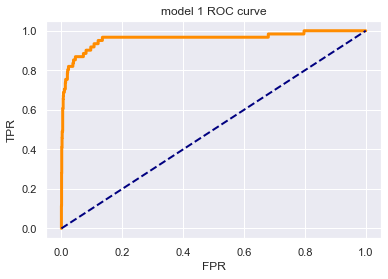

In [47]:
plt.plot(fpr, tpr,   color="darkorange", lw=3,)
plt.title('model 1 ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")

In [48]:
Y_test_2 = encoder.inverse_transform(Y_test)
Y_test_2

array(['H', 'L', 'H', ..., 'H', 'L', 'H'], dtype=object)

In [49]:
predict_result_2 = encoder.fit_transform(predict_result)
predict_result_2

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [50]:
print(roc_auc_score(Y_test, predict_result_2)) #auc값 함수

0.7602321629367852
